### 1. Импорт библиотек

In [60]:
import pandas as pd
import matplotlib.pyplot as plt

### 2. Импортируйте датасет из приложенного файла

In [43]:
ttc = pd.read_csv('titanic.csv')

In [17]:
ttc

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### 3. Установите PassengerId как индекс

In [44]:
ttc.index = range(1, len(ttc.PassengerId)+1)

In [45]:
ttc.index

RangeIndex(start=1, stop=892, step=1)

### 4. Сделайте круговую диаграмму с распределением пассажиров по половому признаку

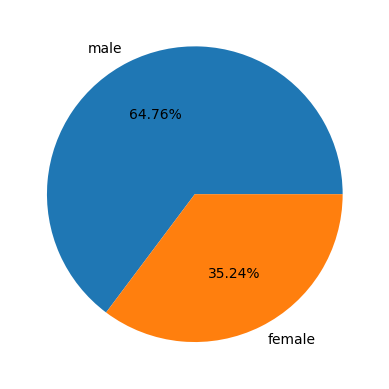

In [74]:
prop_Sex = ttc.Sex.value_counts('male')
prop_Sex *= 100
pie_ch = plt.pie(prop_Sex, labels = prop_Sex.index, autopct='%1.2f%%')
plt.show(pie_ch)

### 5. Сделайте точечный график (scatterplot) зависимости стоимости билета от возраста. Точки для мужчин и женщин должны быть разного цвета

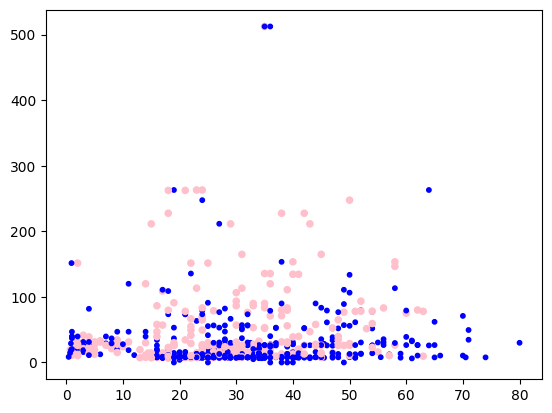

In [131]:
price = plt.scatter(ttc['Age'], ttc['Fare'], c = ['blue' if ttc.Sex[i]== 'male' else 'pink' for i in range(1, len(ttc)+1)], s = [10 if ttc.Sex[i]== 'male' else 20 for i in range(1, len(ttc)+1)] )


In [123]:
x = ttc.Fare[ttc.Fare > 400]
ttc.loc[x.index[2]]

PassengerId                       738
Survived                            1
Pclass                              1
Name           Lesurer, Mr. Gustave J
Sex                              male
Age                              35.0
SibSp                               0
Parch                               0
Ticket                       PC 17755
Fare                         512.3292
Cabin                            B101
Embarked                            C
Name: 738, dtype: object

### 6. Определите, как много людей выжило (абсолютное значение и в %)

In [140]:
# psgr = ttc.count()
survivals = ttc.Survived.value_counts()
survived = survivals[1]
dead = survivals[0]
survivals = ttc.Survived.value_counts(1)
survivals *= 100
print (f'Выжило: {survived} ({survivals[1]:.2f}%)\n', 
       f'Погибло: {dead} ({survivals[0]:.2f}%)\n', sep = '')

Выжило: 342 (38.38%)
Погибло: 549 (61.62%)



### 7. Сделайте столбчатую диаграмму по распределению стоимости проезда

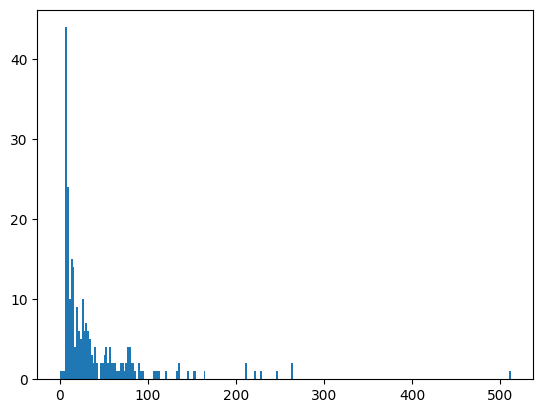

In [210]:
x = ttc.Fare.value_counts()
xT = pd.Series(x.index, index = x.values)
xT
histogramm = plt.hist(xT, bins = len(xT))

### Задайте самостоятельно себе вопрос и найдите ответ. Творческое задание

### Круговая диаграмма женщин по семейному статусу (замужем, холосты или неопределено)

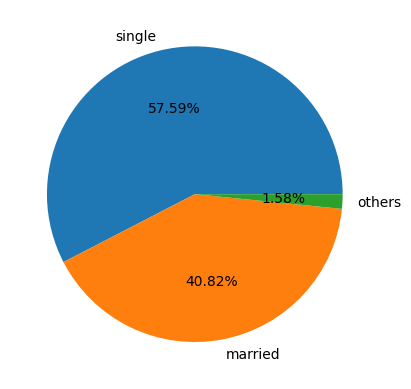

In [270]:
females = ttc[ttc.Sex == 'female']
single = females[females['Name'].str.contains('Miss')]
married = females[females['Name'].str.contains('Mrs.')]
others = females[(~females['Name'].str.contains('Mrs.')) & ~(females['Name'].str.contains('Miss'))]
 
f, s, m, o = len(females), len(single), len(married), len(others)
s, m, o = 100*s/f, 100*m/f, 100*o/f
pie_ch = pd.Series([s, m, o], index = ['single', 'married', 'others'])
pie_ch = plt.pie(pie_ch, labels = pie_ch.index, autopct='%1.2f%%')

